<a href="https://colab.research.google.com/github/me-osama/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

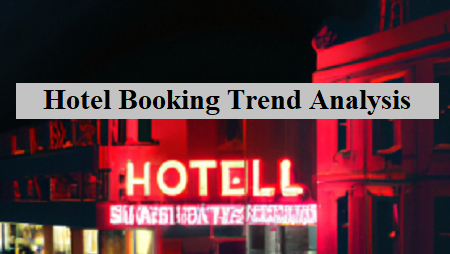

**Introduction:**
Our given dataset is a hotel booking data set. I analyzed a hotel booking dataset and discovered important factors related to hotel bookings. Firstly, I read the dataset in my collab notebook and gained an understanding of its variables. Next, I performed data cleaning and wrangling by using functions like drop(), fillna(), isna()/isnull(). I also added necessary columns for analysis and removed unnecessary ones.

To explore the variables, I utilized visualization charts such as pie charts, count plots, bar plots, and heatmaps. These visualizations provided insights into the significant factors. Based on these findings, I can suggest relevant business objectives to clients.

In this project, we will analyze a Hotel Booking dataset that includes information about city hotels and resort hotels. The dataset contains various details such as booking time, length of stay, number of adults, children, and/or babies, as well as available parking spaces, among other attributes.

The main objective of this project is to explore and analyze the data to uncover significant factors related to hotel bookings and their associated attributes.

**Objective of this data analysis**
Perform a thorough analysis of the Hotel Booking data to identify and understand the various factors that impact the booking process.

#**Import required libraries and mount drive**

In [ ]:
#Mount or connect the google drive with the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [ ]:
#Find the path of the Telecom churn csv file
working_dataset = '/content/drive/MyDrive/Capstone_Project_Almabetter/EDA_Project/Hotel Booking Analysis/hotel_data/Hotel Bookings.csv'

#Read the csv file using path
df = pd.read_csv(working_dataset)                                            #Read csv file

In [ ]:
#Make a copy of the churn dataframe
df1 = df.copy()                                                              #To prevent original dataframe

# **Find some information about the datafile for doing analysis**

In [ ]:
#First view of dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Count rows and columns in dataframe
df.shape                                

(119390, 32)

In [ ]:
#Dataset Information
#understanding the given information in dataset
df.info()                               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
 #See the full description of dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#**Do Some Data Cleaning Stuff**

In [ ]:
# Count all the duplicate value present in the given data set
duplicate_values = df1.duplicated().value_counts()  
duplicate_values

False    87396
True     31994
dtype: int64

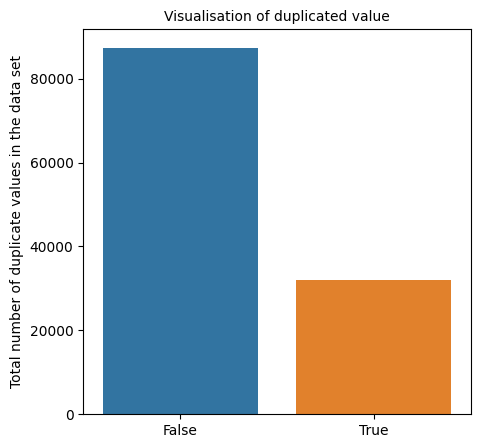

In [ ]:
#Take a look (by visualizing the duplicate values)
plt.figure(figsize=(5,5))
sns.countplot(x=df1.duplicated())
plt.title('Visualisation of duplicated value', fontsize = 10)
plt.ylabel('Total number of duplicate values in the data set', fontsize = 10)
plt.show()

In [ ]:
#Now, drop all the duplicate values available in the given dataset
df1 = df1.drop_duplicates()
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Now, check the shape of dataset after dropping the duplicates.
df1.shape

(87396, 32)

In [ ]:
#Count all the missing values in the dataset 
missing_value = df1.isnull().sum().sort_values(ascending=False)[:5]
missing_value

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

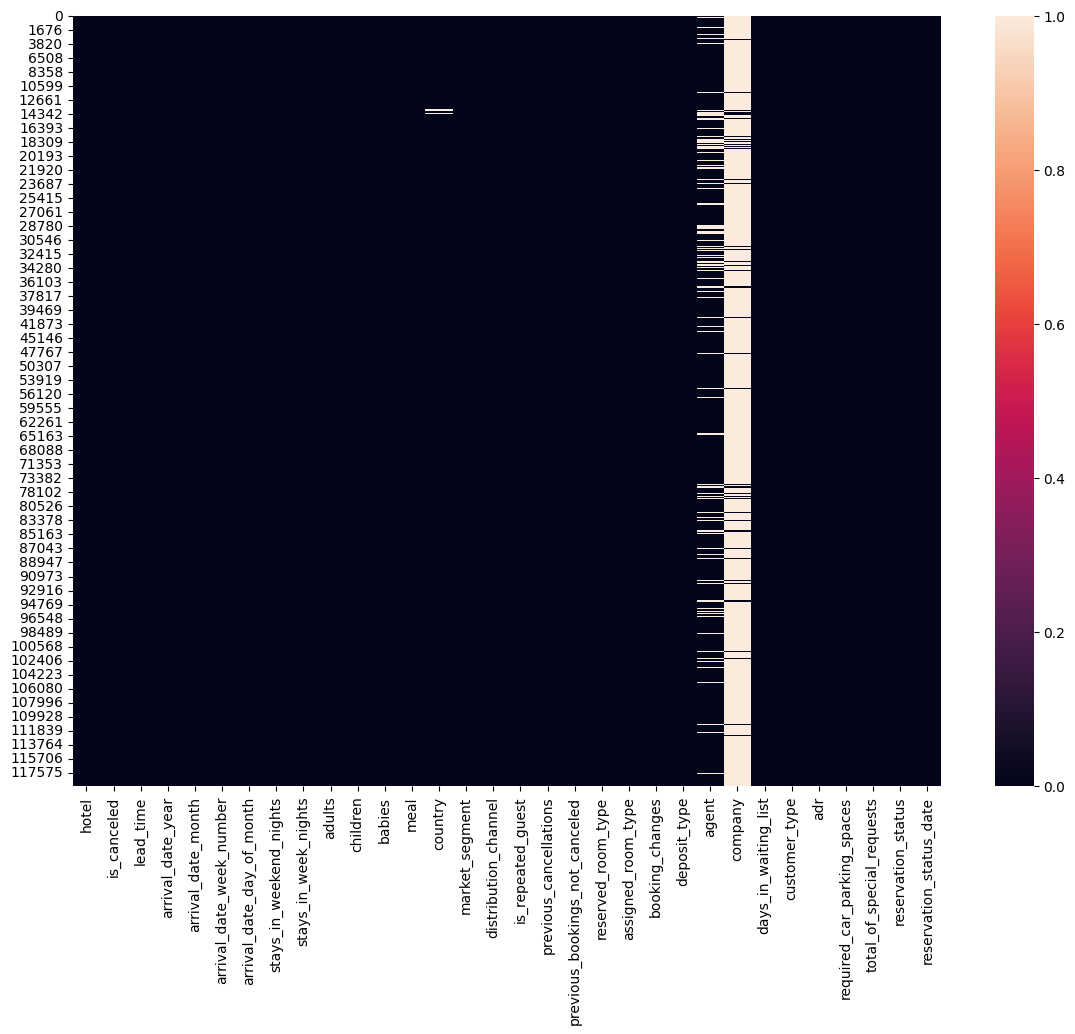

In [ ]:
#Now, take a look by visualizing the missing values
plt.figure(figsize=(14,10))
sns.heatmap(df1.isnull())
plt.show()

The dataset provided is related to Hotel Bookings, and our goal is to analyze and explore it in order to identify the important factors that influence hotel bookings.

This dataset consists of 119,390 rows and 32 columns. After examining the data, we found that there are 31,994 rows with duplicate values across all 32 columns. Additionally, there are four columns in the dataset that contain missing values: company, agent, country, and children. These missing values will need to be addressed during the analysis process.

###**Understanding Your Variables**

In [ ]:
#Check all the columns of the given Dataset
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Now, take a look of dataframe after adding columns
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Now, again check the description of the dataset
df1.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,75203.000000,5259.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,94.138306,183.081384,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,113.188172,130.557608,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,47.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,169.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,240.000000,263.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


**Variables Description**
*  **Hotel:** Type of hotel(City or Resort)
*  **is_cancelled:** If the booking was cancelled(1) or not(0)
*  **lead_time:** Number of days before the actual arrival of the guests
*  **arrival_date_year:** Year of arrival date
*  **arrival_date_month:** Month of arrival date
*  **arrival_date_week_number:** Week number of year for arrival date
*  **arrival_date_day_of_month:** Day of arrival date
*  **stays_in_weekend_nights:** Number of weekend nights(Saturday or Sunday) spent at the hotel by the guests.
*  **stays_in_weel_nights:** Number of weeknights(Monday to Friday) spent at the hotel by the guests.
*  **adults:** Number of adults among the guests
*  **children:** Number of children
*  **babies:** Number of babies
*  **meal:** Type of meal booked
*  **country:** country of the guests
*  **market_segment:** Designation of market segment
*  **distribution_channel:** Name of booking distribution channel
*  **is_repeated_guest:** If the booking was from a repeated guest(1) or not(0)
*  **previous_cancellation:** Number of previous bookings that were cancelled by the customer prior to the current booking
*  **previous_bookings_not_cancelled:** Number of previous bookins not cancelled by the customer prior to the current bookin
*  **reserved_room_type:** Code from room type reserved
*  **assigned_room_type:** Code of room type assigned
*  **booking_changes:** Number of changes made to the booking
*  **deposit_type:** Type of deposite made by the guest
* **agent:** ID of travel agent who made the booking
*  **comapny:** ID of the company that made the booking
*  **days_in_waiting_list:** Number of the days the booking was in the waiting list
*  **customer_type:** Type of customer, assuming one of four categories
*  **adr:** Average daily rate
*  **required_car_parking_spaces:** Number of car parking spaces required bt the customer
*  **total_of_special_requesrs:** Number of special requests made by the customer
*  **reservation_statuse:** Reservation status(Canceled, check-out or no-show)
*  **reservation_status_date:** Date at which the last reservation status was updated


In [ ]:
#Now, check unique values for each variable.
print(df1.apply(lambda col: col.unique()))                                   #using lambda fuction of indivisual column, to describe all the unique values

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# **Do data wrangling stuffs**

In [ ]:
#Here duplicate values are drop which I have already found.
df1 = df1.drop_duplicates()
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Null values are replaced using for loop and .fillna()
null_columns=['company','agent','children']
for columns in null_columns:
  df1[columns].fillna(0,inplace=True)

In [ ]:
#Null valyes in contry column is replced by others using .fillna()
df1['country'].fillna('others',inplace=True)

In [ ]:
df1.isna().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

### Adding New Columns

In [ ]:
#Now, add column representing the total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

#Adding total people number as a column
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [ ]:
#view datafram (df1) with added column
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


### In the given dataset some rows with total number of adults, children or babies is equal to zero. It means that there is no any booking were made. So, we should remove such rows from the given dataset.###

In [ ]:
#Shape of columns which have no bookings or zero booking
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 34)

In [ ]:
#Drop such Column from the dataset using drop function
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### From above stuffs we have obtained the following insights

In the provided dataframe, 31,994 duplicate values were identified and subsequently removed to ensure data accuracy.

Four columns, namely 'company', 'agent', 'country', and 'children', contained missing values. To address this, the missing values in these columns were replaced with zeros.

To enhance the dataframe, two additional columns, namely 'total_stay' and 'total_people', were added.

Since the columns 'adults', 'children', and 'babies' had zero values indicating no bookings, these columns were removed from the dataframe.

#**Data Visualization, Storytelling & Experimenting with charts : To Understand the relationships between variables**

### **Univariate Analysis** ###

#### Chart - 1

1) Which type of hotel is mostly prefered by the guests?

In [ ]:
# Chart - 1 visualization code
hotel_value_counts = df1['hotel'].value_counts()
hotel_value_counts

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

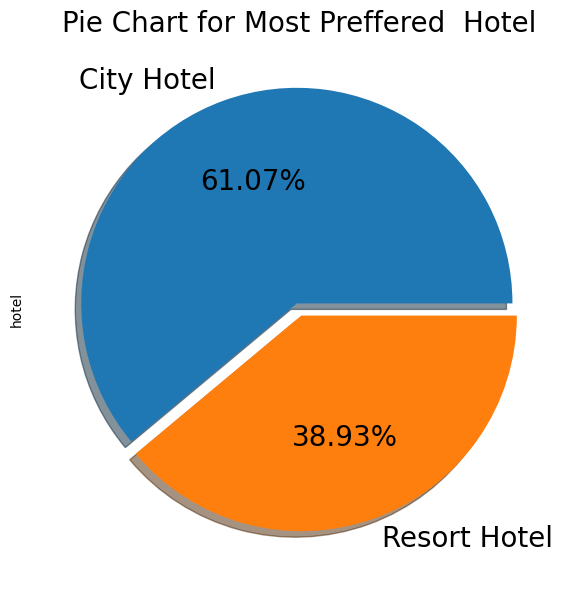

In [ ]:
# piechart is used for visualization
hotel_value_counts.plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=True, figsize=(10,7),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel',fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

I opted to use a pie chart because it provides a straightforward and easily interpretable visual representation of which hotel has a higher number of bookings.

##### 2. What is/are the insight(s) found from the chart?

After analyzing the data, it was observed that the city hotel had a higher number of bookings, accounting for approximately 61.07% of the total bookings. On the other hand, the resort hotel had a relatively lower number of bookings, comprising approximately 38.93% of the total bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the analysis can have a positive impact on the business.

For the city hotel, identifying additional services or amenities that can attract more guests would be beneficial. This could include offering unique experiences, enhancing existing facilities, or providing specialized services that cater to the preferences of the target audience. By implementing these improvements, the city hotel can increase its revenue and attract a larger customer base.

As for the resort hotel, finding solutions to attract guests is crucial. This could involve analyzing the factors that make the city hotel more appealing to guests and identifying ways to incorporate similar facilities or services at the resort hotel. Understanding the preferences and expectations of potential guests and tailoring the offerings accordingly can help attract more bookings and enhance the resort hotel's competitiveness in the market.

Overall, using the insights gained from the analysis, both the city hotel and resort hotel can make informed decisions and take strategic actions to optimize their offerings and improve their business performance.

#### Chart - 2

2) Which agent made the most bookings?

In [ ]:
# Chart - 2 visualization code
top_bookings_by_agent = df1['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
top_bookings_by_agent

,agent,num_of_bookings
0,9.0,28721
1,240.0,13028
2,0.0,12141
3,14.0,3342
4,7.0,3294
5,250.0,2779
6,241.0,1644
7,28.0,1493
8,8.0,1383
9,1.0,1228


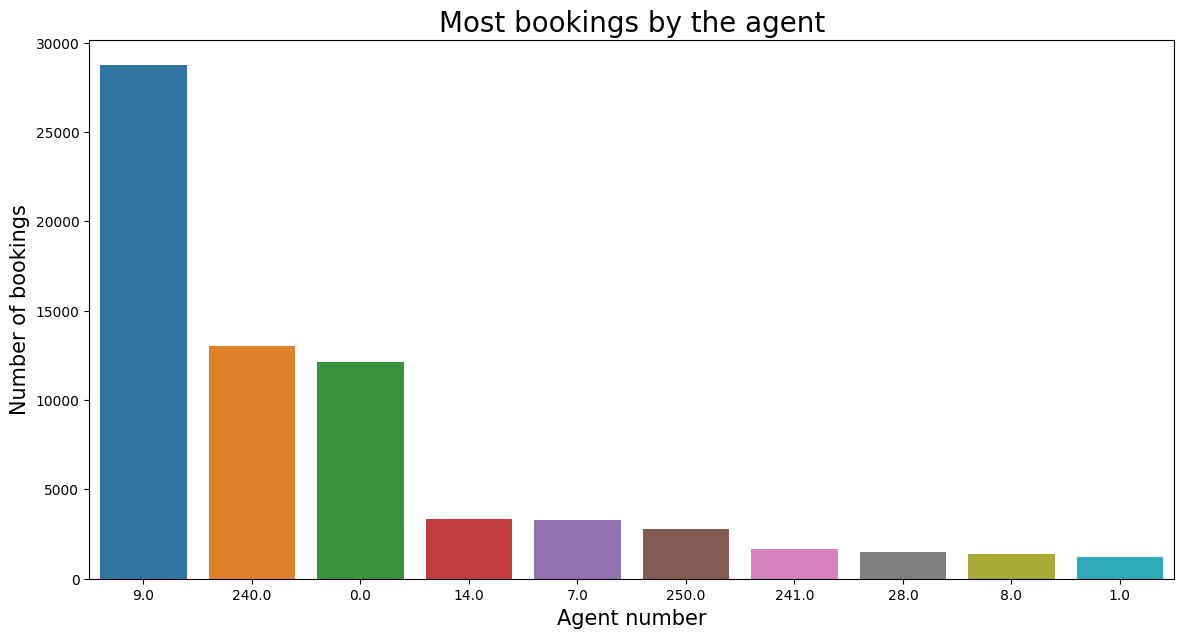

In [ ]:
# barplot is used for visualization
plt.figure(figsize=(14,7))
sns.barplot(x=top_bookings_by_agent['agent'],y=top_bookings_by_agent['num_of_bookings'],order=top_bookings_by_agent['agent'])
plt.title('Most bookings by the agent', fontsize=20)
plt.ylabel('Number of bookings', fontsize=15)
plt.xlabel('Agent number', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

I selected a bar plot as the visualization method because it presents data in a graphical format, making it easier to compare different categories or variables. This allows for a more straightforward visual comparison of the data and facilitates better understanding of the insights.

##### 2. What is/are the insight(s) found from the chart?

The analysis revealed that Agent number 9 was responsible for the majority of the bookings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Agent number 9, with a total of 240 bookings, had a significant positive impact. On the other hand, agents number 1 and 6 had relatively fewer bookings, indicating a negative impact. The bookings made by agents number 1 and 6 accounted for approximately 4.27% of the bookings made by agent number 9, which had the highest number of bookings.

#### Chart - 3

3) What is the percentage of repeated guests?

In [ ]:
# Chart - 3 visualization code
# 1 is for booking made by repeated buest and 0 is for booking not made by repeated guest
repeated_guests_count = df1['is_repeated_guest'].value_counts()
repeated_guests_count

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Percentage of repeated guests ')

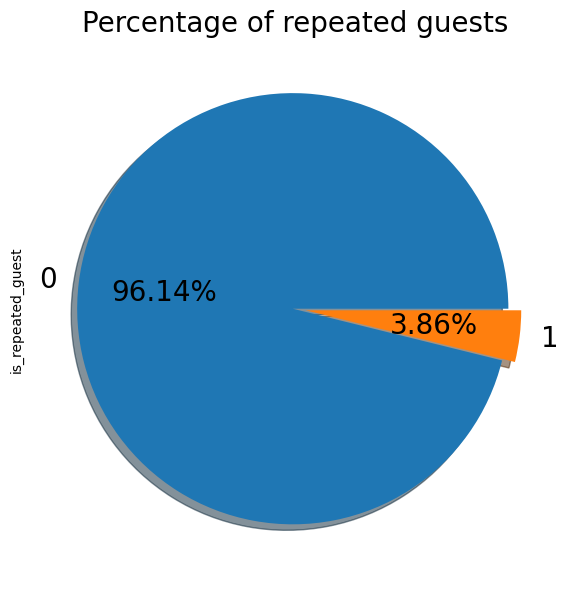

In [ ]:
# barplot is used for visaulization
repeated_guests_count.plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=True, figsize=(10,7),fontsize=20)
plt.title('Percentage of repeated guests ',fontsize = 20)

##### 1. Why did you pick the specific chart?

**I use pie chart because pie chart gives simple and easy to understand picture that shows how many guests book perticular hotel repetadly.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is there are very few guests booking for the same hotel again.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights help creating a positive business impact like the hotels which do not booked repetadly by guests can take feedbacks from the guests and try to impove there services.**

#### Chart - 4

4) What is the most preferred room type by the customers?

In [ ]:
# Chart - 4 visualization code
room_type = df1['assigned_room_type'].value_counts()
room_type

A    46283
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

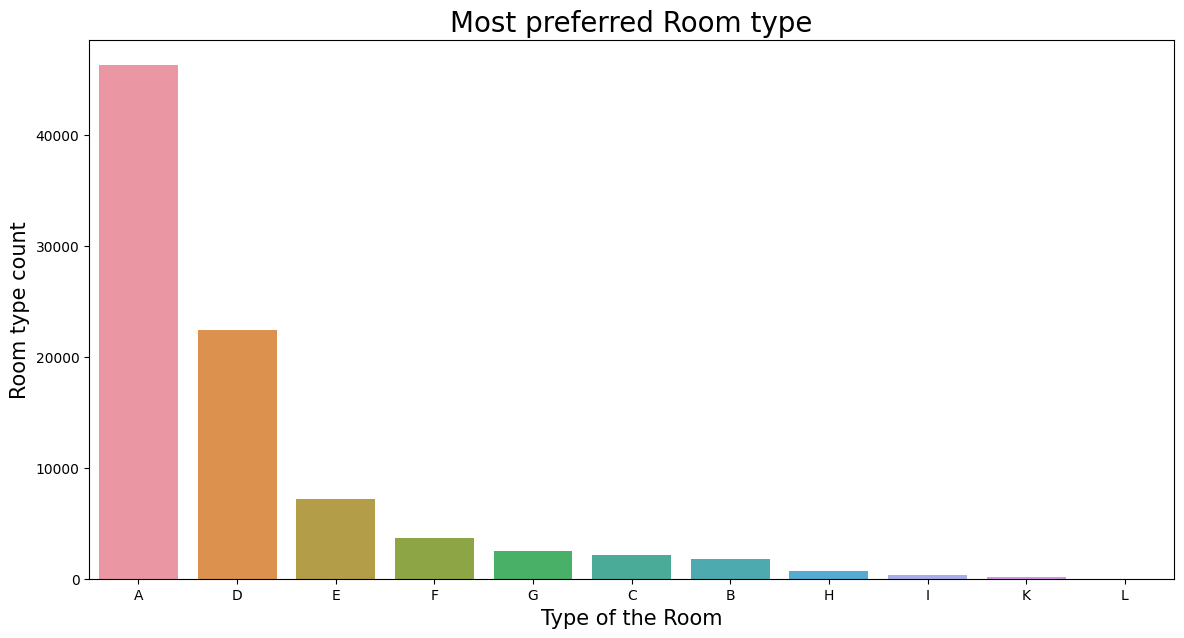

In [ ]:
# countlot is used for visualization of most preferred room type
plt.figure(figsize=(14,7))
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
plt.title("Most preferred Room type", fontsize = 20)
plt.xlabel('Type of the Room', fontsize = 15)
plt.ylabel('Room type count', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

**I have choose countplot to visualize most prefferd roomtype because countplot display the count of each observation for each category and here we have to represent room type vs room type count.**

##### 2. What is/are the insight(s) found from the chart?

**The insighte found from the chart is A type rooms are most prefered rooms and the count is 46283 and after that D type rooms are prefered by the guest and count is 22419.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **A type rooms are most preferred rooms. This make positive impact on business.**
* **H,I,K,L type rooms are less preferred this insight makes neative impact.**
* **This is beacause type A rooms have 46283 bookings anf type L room has only one booking.**

#### Chart - 5

5) What type of food is mostly prefered by the guests?

In [ ]:
# Chart - 5 visualization code
preferred_food = df1['meal'].value_counts()
preferred_food

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0, 0.5, 'Food type count')

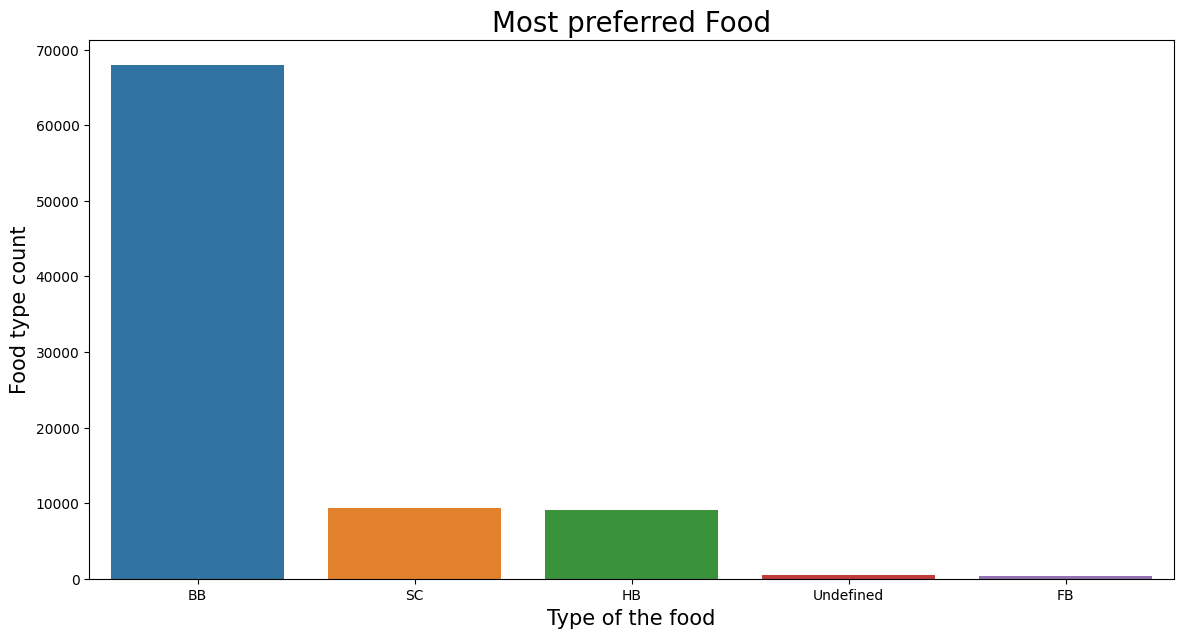

In [ ]:
# Visualization of most preferred food using countplot
plt.figure(figsize=(14,7))
sns.countplot(x=df1['meal'],order=df1['meal'].value_counts().index)
plt.title("Most preferred Food", fontsize = 20)
plt.xlabel('Type of the food', fontsize = 15)
plt.ylabel('Food type count', fontsize = 15)

##### 1. Why did you pick the specific chart?

**I have choose countplot to visualize most preferred food because countplot display the count of each observation for each category and here we have to represent food type vs food type count.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found here is BB type food is most preferred anf FB type of food is less preferred.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **BB type of food is most preferred food this makes positive impact on business.**
* **Undefined and FB type of food is less preferred this insight makes neative impact on business.**
* **The BBtype food is preferred by 67907 guests and FB type of food is preferred by only 360 guests.**

#### Chart - 6

6) In which month most of the bookings happened? 

In [ ]:
bookings_by_months=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts of booking"})
bookings_by_months

,arrival_date_month,Counts of booking
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7489
8,May,8344
9,November,4973


In [ ]:
# Chart - 6 visualization code
bookings_by_months=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts of booking"})
sequence_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=sequence_of_months,ordered=True)
bookings_by_months=bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,Counts of booking
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of Bookings')

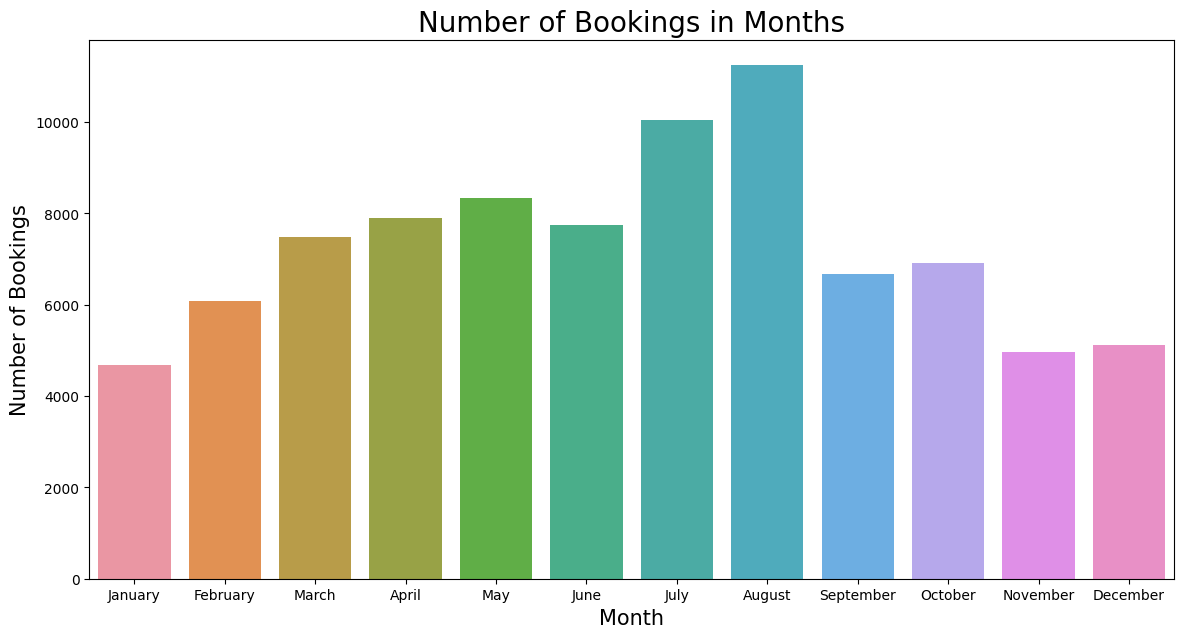

In [ ]:
# barplot for visualization of month in which most booking happened.
plt.figure(figsize=(14,7))
sns.barplot(data=bookings_by_months, x="arrival_date_month", y="Counts of booking")
plt.title("Number of Bookings in Months", fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 15)

##### 1. Why did you pick the specific chart?

**I choose barplot here because it gives data visualization in pictorial form. So comparison becomes easy.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is August month has maximum number of bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **July and August months have most bookings this is positive impact on business**
* **November, December and January months have less bookins this is neative impact.**
* **July and August months have bookings above the average bookings and November, December and January months have bookings below the average bookings.**

#### Chart - 7

7) Which distribution channel is mostly used for hotel booking?

In [ ]:
# Chart - 7 visualization code
# distribution channel value count
distribution_channel_counts = df1['distribution_channel'].value_counts()
distribution_channel_counts

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
#shape of dataframe 
d3 = df1.shape[0]
d3

87230

In [ ]:
# distribution channel count in df format
distribution_channel_df = df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
distribution_channel_df

,distribution_channel,count
0,TA/TO,69028
1,Direct,12954
2,Corporate,5062
3,GDS,181
4,Undefined,5


In [ ]:
# booking by distribution channel in percent 
distribution_channel_df_percent = pd.DataFrame(round((distribution_channel_counts/d3)*100,2)).reset_index().rename(columns={'index':'distribution_channel','distribution_channel':'% booking'})
distribution_channel_df_percent

,distribution_channel,% booking
0,TA/TO,79.13
1,Direct,14.85
2,Corporate,5.80
3,GDS,0.21
4,Undefined,0.01


Text(0, 0.5, 'Booking by distribution channel in percent')

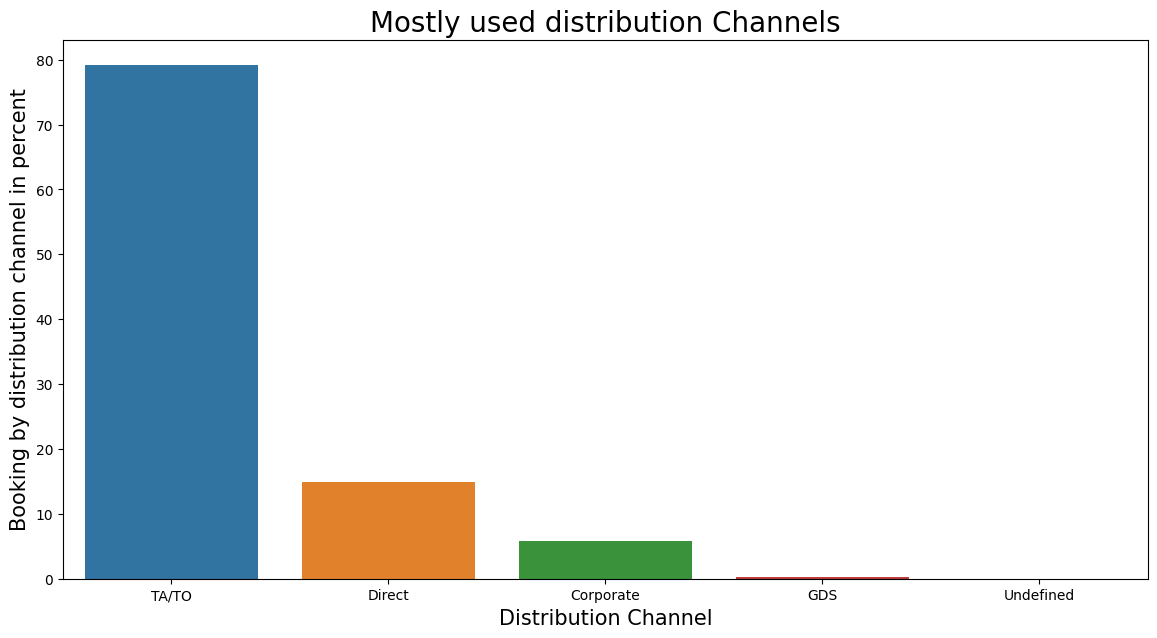

In [ ]:
#Visualization of mostly used distribution channels using barplot
plt.figure(figsize=(14,7))
sns.barplot(data=distribution_channel_df_percent, x="distribution_channel", y="% booking")
plt.title("Mostly used distribution Channels", fontsize = 20)
plt.xlabel('Distribution Channel', fontsize = 15)
plt.ylabel('Booking by distribution channel in percent', fontsize = 15)

##### 1. Why did you pick the specific chart?

**Because barplot gives simple and easy to understand pictorial chart.**

##### 2. What is/are the insight(s) found from the chart?

**Mostly used distribution channel is TA/TO channel.The total count of booking is 69028 and booking in percent is 79.13.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **Distribution channel TA/TO is mostly used channel this makes positive impact.**
* **Distribution channel GDS and undefined is less used channels this makes negative impact.**
* **Use of TA/TO is 79.13% and use of GDS is 0.21%.**
* **Other channels can provide those facilities which are provided by TA/TO channel.**

#### Chart - 8

8) which year had highest bookings? 

In [ ]:
# Chart - 8 visualization code
year_count = df1['arrival_date_year'].value_counts().sort_index()
year_count

2015    13284
2016    42313
2017    31633
Name: arrival_date_year, dtype: int64

Text(0, 0.5, 'Count of bookings')

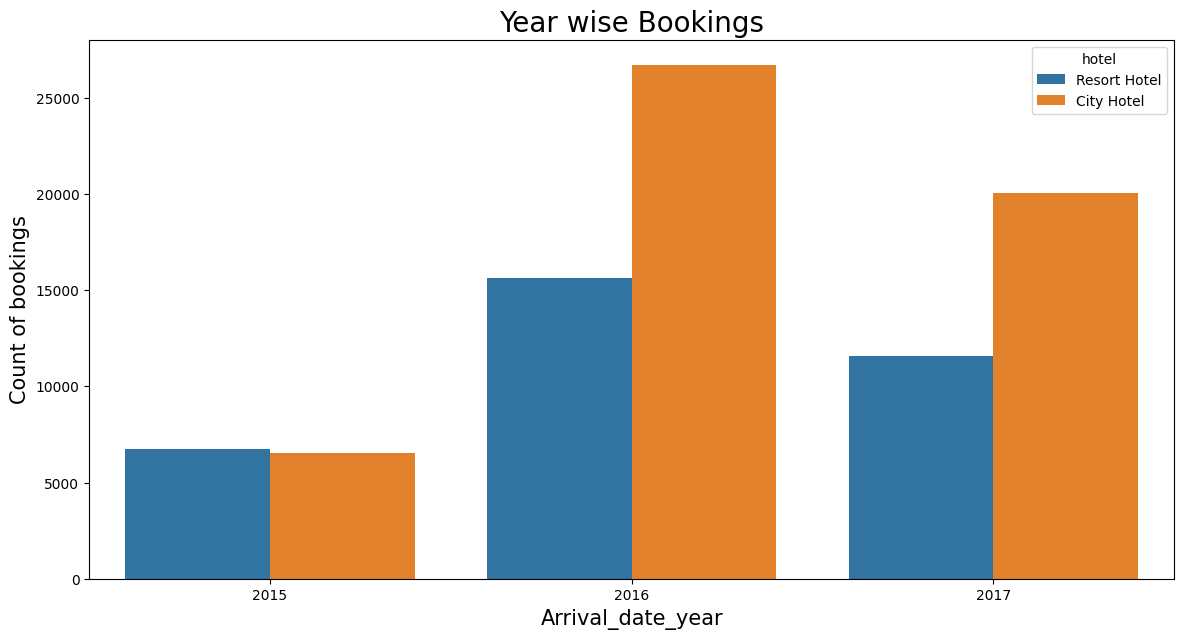

In [ ]:
# Visualization of year wise booking using countplot chart
plt.figure(figsize=(14,7))
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title('Year wise Bookings', fontsize = 20)
plt.xlabel('Arrival_date_year', fontsize = 15)
plt.ylabel('Count of bookings', fontsize = 15)

##### 1. Why did you pick the specific chart?

**Because countplot is easy to understand.**

##### 2. What is/are the insight(s) found from the chart?

**2016 had highest bookings and 2015 had lowest bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **Year 2016 had highest bookings this makes positive impact.**
* **Year 2015 had lowest bookings this makes negative impact.**
* **In 2016 there were 42313 bookings and In 2015 there were 13284 bookings.**

# **Bivariate and Multivariate analysis**

#### Chart - 9

1) Which hotel type has the highest ADR?

In [ ]:
# Chart - 9 visualization code
highest_adr = df1.groupby('hotel')['adr'].mean().reset_index()
highest_adr

,hotel,adr
0,City Hotel,111.271969
1,Resort Hotel,99.059517


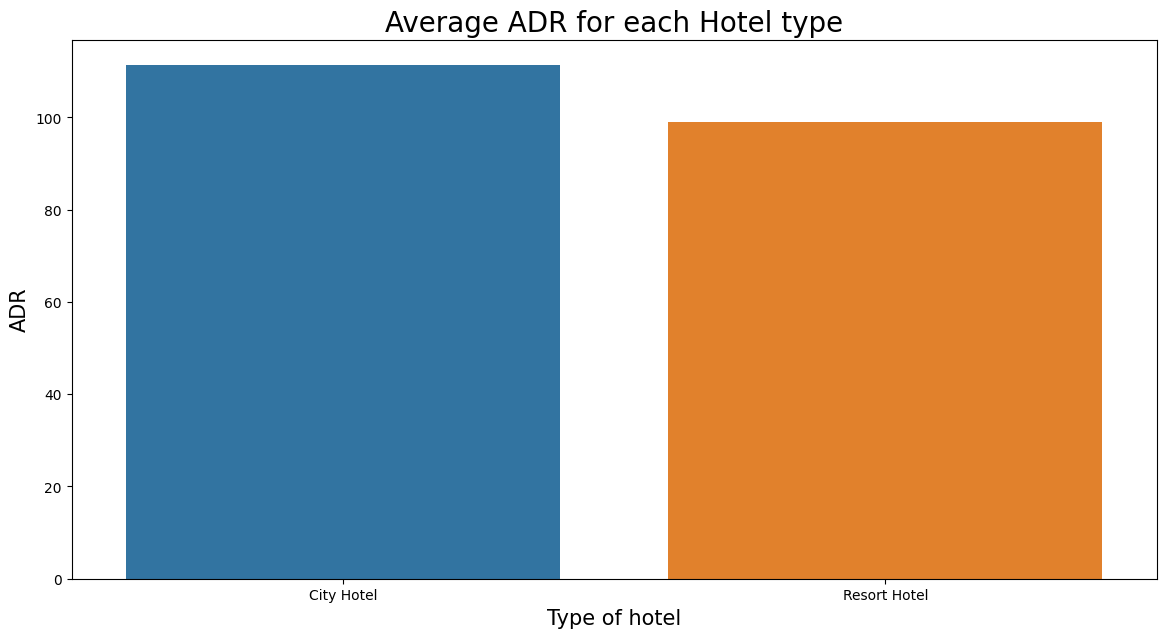

In [ ]:
# Visualization of highest adr using barplot
plt.figure(figsize=(14,7))
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])
plt.title('Average ADR for each Hotel type', fontsize=20)
plt.xlabel('Type of hotel',fontsize=15)
plt.ylabel('ADR', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

**I choose bar plot because it gives simple pictorial diagram and it also easy to understand.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is City hotel has highest adr that means city hotel generate more revenue.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **City hotel has high adr this makes positive impact.**
* **Resort hotel has less adr as compaire to city hotel this makes negative impact.**
* **City hotel has adr 110.98 means more revenue and resort hotel has 99.02 adr means less revenue than city hotel.**
* **Resort hotel should have increase there facilitis which increase revenue.** 


#### Chart - 10

2) which hotel has longer waiting time?

In [ ]:
# Chart - 10 visualization code
Waiting_time = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
Waiting_time

,hotel,days_in_waiting_list
0,City Hotel,1.020066
1,Resort Hotel,0.316763


Text(0, 0.5, 'Waiting time')

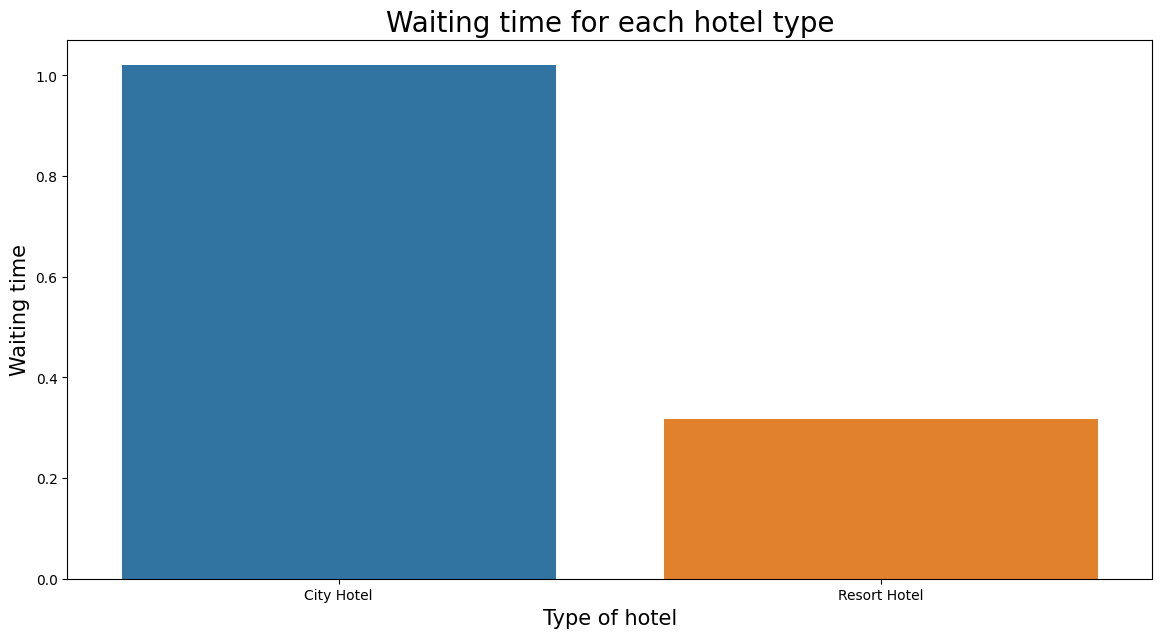

In [ ]:
# Visualization of hotel which has longer waiting time by using barplot
plt.figure(figsize=(14,7))
sns.barplot(x=Waiting_time['hotel'],y=Waiting_time['days_in_waiting_list'])
plt.title('Waiting time for each hotel type', fontsize=20)
plt.xlabel('Type of hotel',fontsize=15)
plt.ylabel('Waiting time', fontsize=15)

##### 1. Why did you pick the specific chart?

**I choose barplot bacuase it gives easy to understand pictorial diagram for the visualization of which hotel has longer waiting time.**

##### 2. What is/are the insight(s) found from the chart?

**City hotel has longer waiting time.Therefore city hotel is much busier than Resort hotel.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **City hotel has longer waiting time this makes positive impact on business.**
* **Resort hotel has less waiting time this makes negative impact on business.**
* **The mean of days in waiting list for city hotel is about 1.02 and for resort hotel is about 0.32.**
* **Resort hotel need to increase their facilities so that their bookings increases.**

#### Chart - 11

3) Which distribution channel contributed more to adr in order to increase the income?

In [ ]:
# Chart - 11 visualization 
distribution_channel = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


Text(0, 0.5, 'ADR')

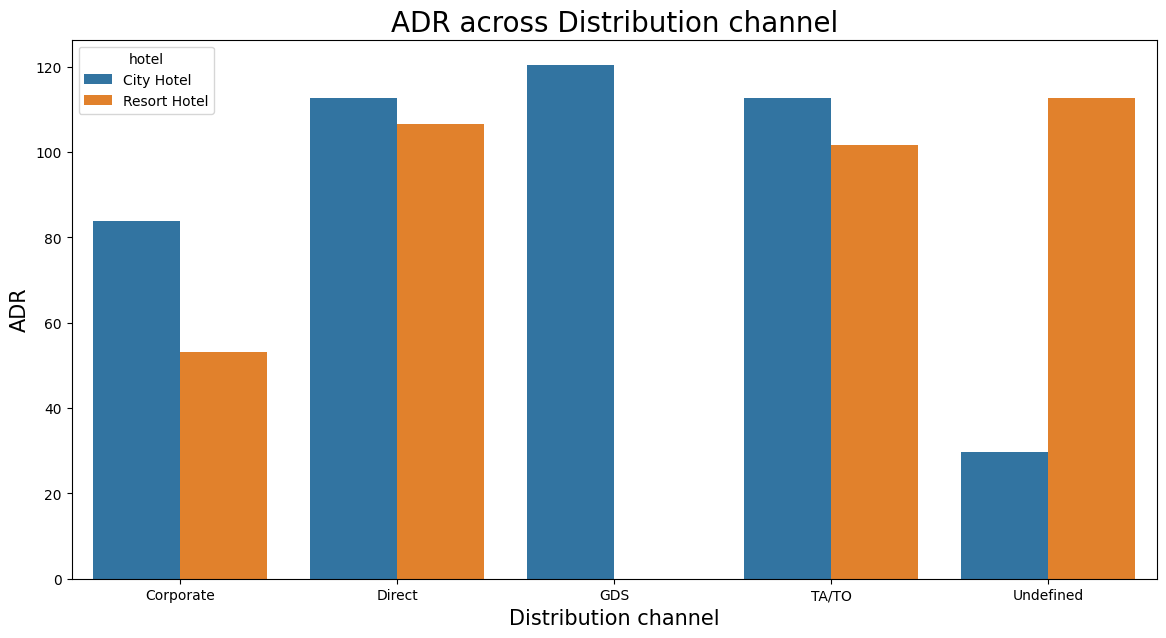

In [ ]:
# Visualization of contribution of distribution channel in adr using barplot
plt.figure(figsize=(14,7))
sns.barplot(x='distribution_channel',y='adr', data=distribution_channel,hue='hotel')
plt.title('ADR across Distribution channel', fontsize=20)
plt.xlabel('Distribution channel',fontsize=15)
plt.ylabel('ADR', fontsize=15)

##### 1. Why did you pick the specific chart?

**I choose here barplot to visualise ADR across distribution channel beacuse it give easy to undertand visualization to large data.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the above chart is that GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **GDS distribution channel contributed more to adr for city hotel and Undefined distribution channel contributed more to adr for resort hotel this makes positive impact.**
* **GDS distribution channel has no any contribution to adr for resort hotel and undefined distribution channel contributed less to adr for city hotel this makes neative impact.**
* **GDS distribution channel must have increase bookings for resort hotels therefore there contribtuion to adr will increase and income will increase and undefined distribution channel must have increase bookings for city hotels therefore there contribution to adr will increase and income will increase.**

#### Chart - 12

4) What is optimal stay length in both types of hotel?

In [ ]:
# Chart - 12 visualization code
stay_length = df1.groupby(['total_stay','hotel']).agg('count').reset_index()
stay_length = stay_length.iloc[:, :3]
stay_length = stay_length.rename(columns={'is_canceled':'Number of stays'})
stay_length                           

,total_stay,hotel,Number of stays
0,0,City Hotel,231
1,0,Resort Hotel,360
2,1,City Hotel,10270
3,1,Resort Hotel,6899
4,2,City Hotel,10813
...,...,...,...
68,46,Resort Hotel,1
69,48,City Hotel,1
70,56,Resort Hotel,2
71,60,Resort Hotel,1


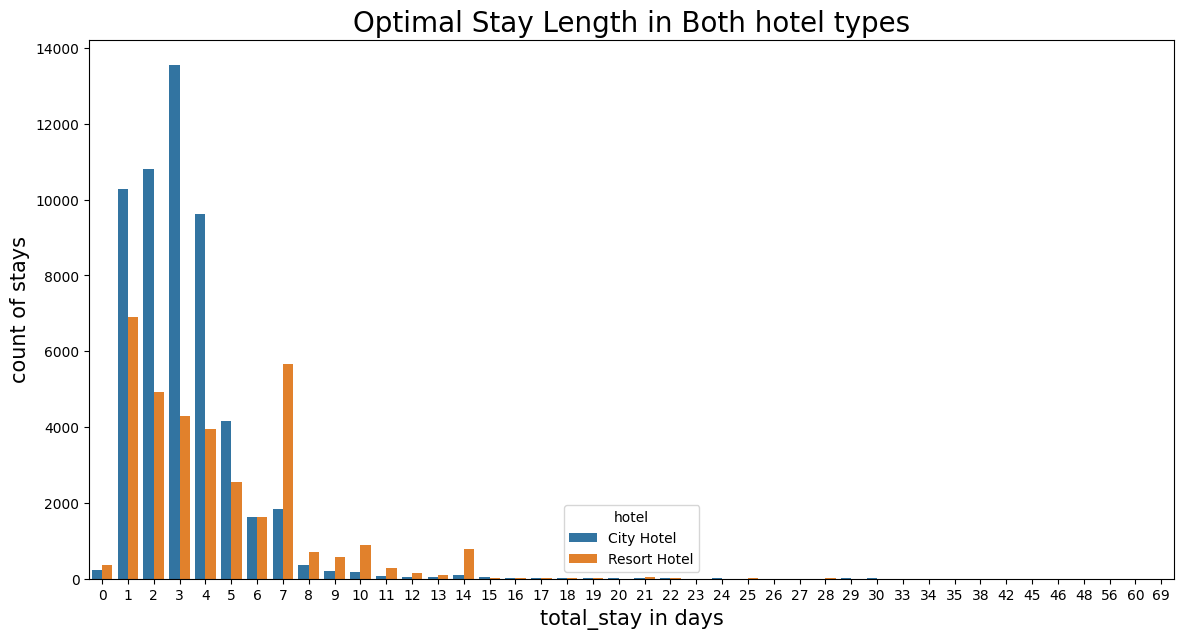

In [ ]:
# Barplot is used for visualization of optimal stay length in hotel type
plt.figure(figsize=(14,7))
sns.barplot(x='total_stay',y='Number of stays', data=stay_length,hue='hotel')
plt.title('Optimal Stay Length in Both hotel types', fontsize=20)
plt.xlabel('total_stay in days',fontsize=15)
plt.ylabel('count of stays', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

**Because it gives simple visualization.**

##### 2. What is/are the insight(s) found from the chart?

**Optimal stay length in both hotel type is less than 7 days.**

#### Chart - 13

5) Relationship between the repeated guests and previous bookings not canceled?

In [ ]:
# Chart - 13 visualization code
repeated_guests = df1[df1['is_repeated_guest']==1]
repeated_guests_1 = df1[df1['is_repeated_guest']==0]

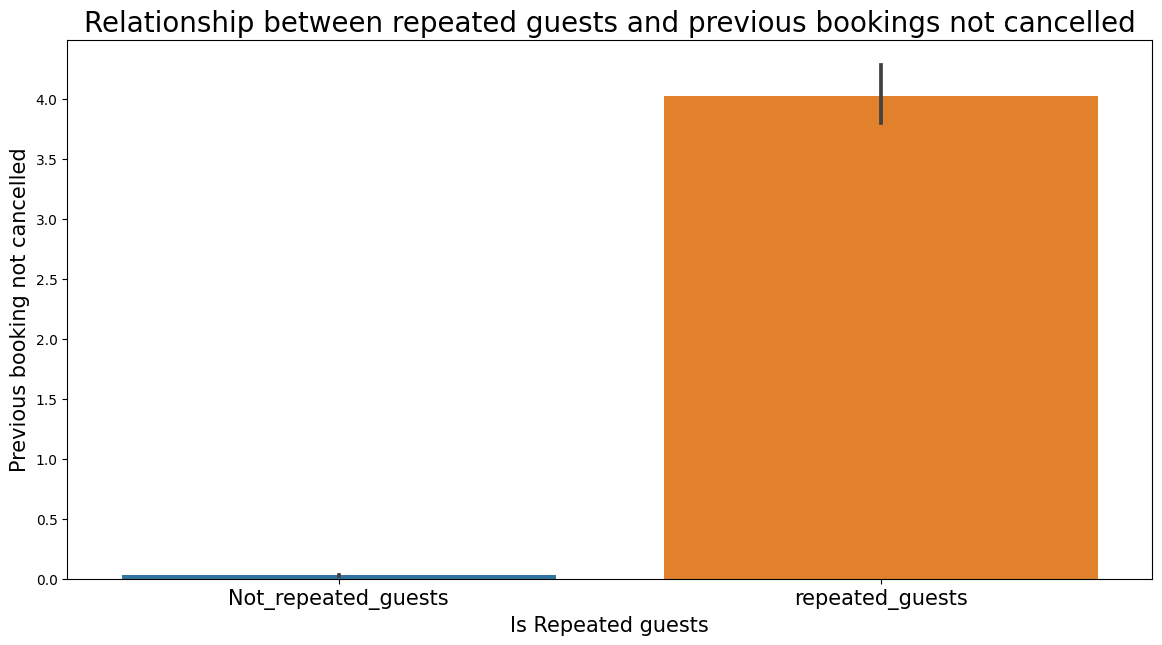

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.xlabel('Is Repeated guests',fontsize=15)
plt.ylabel('Previous booking not cancelled', fontsize=15)
plt.title('Relationship between repeated guests and previous bookings not cancelled', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

**Because bar plot is easy to understand.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from this chart is that not repeated guests cancel their bookings.**

#### Chart - 14 

6) Relationship between ADR and total number of people?

In [ ]:
# Chart - 14 visualization code
number_of_people = df1[df1['total_people']<5]
number_of_people

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2.0


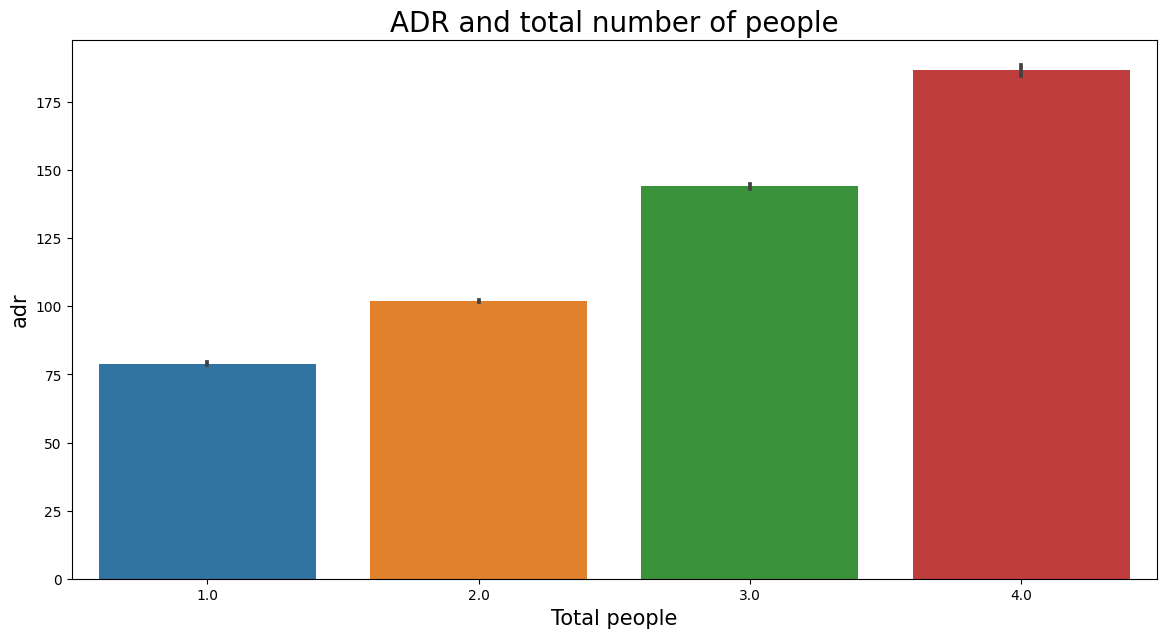

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x=number_of_people['total_people'],y= number_of_people['adr'])
plt.title('ADR and total number of people', fontsize=20)
plt.xlabel('Total people',fontsize=15)
plt.ylabel('adr', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

**I choose barplot because it gives simple visualization of data.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the above plot is that number of people increases adr aslo going to increase.**

#### Chart - 15 - Correlation Heatmap

In [ ]:
df1.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0


<ipython-input-61-f0459d2e1549>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


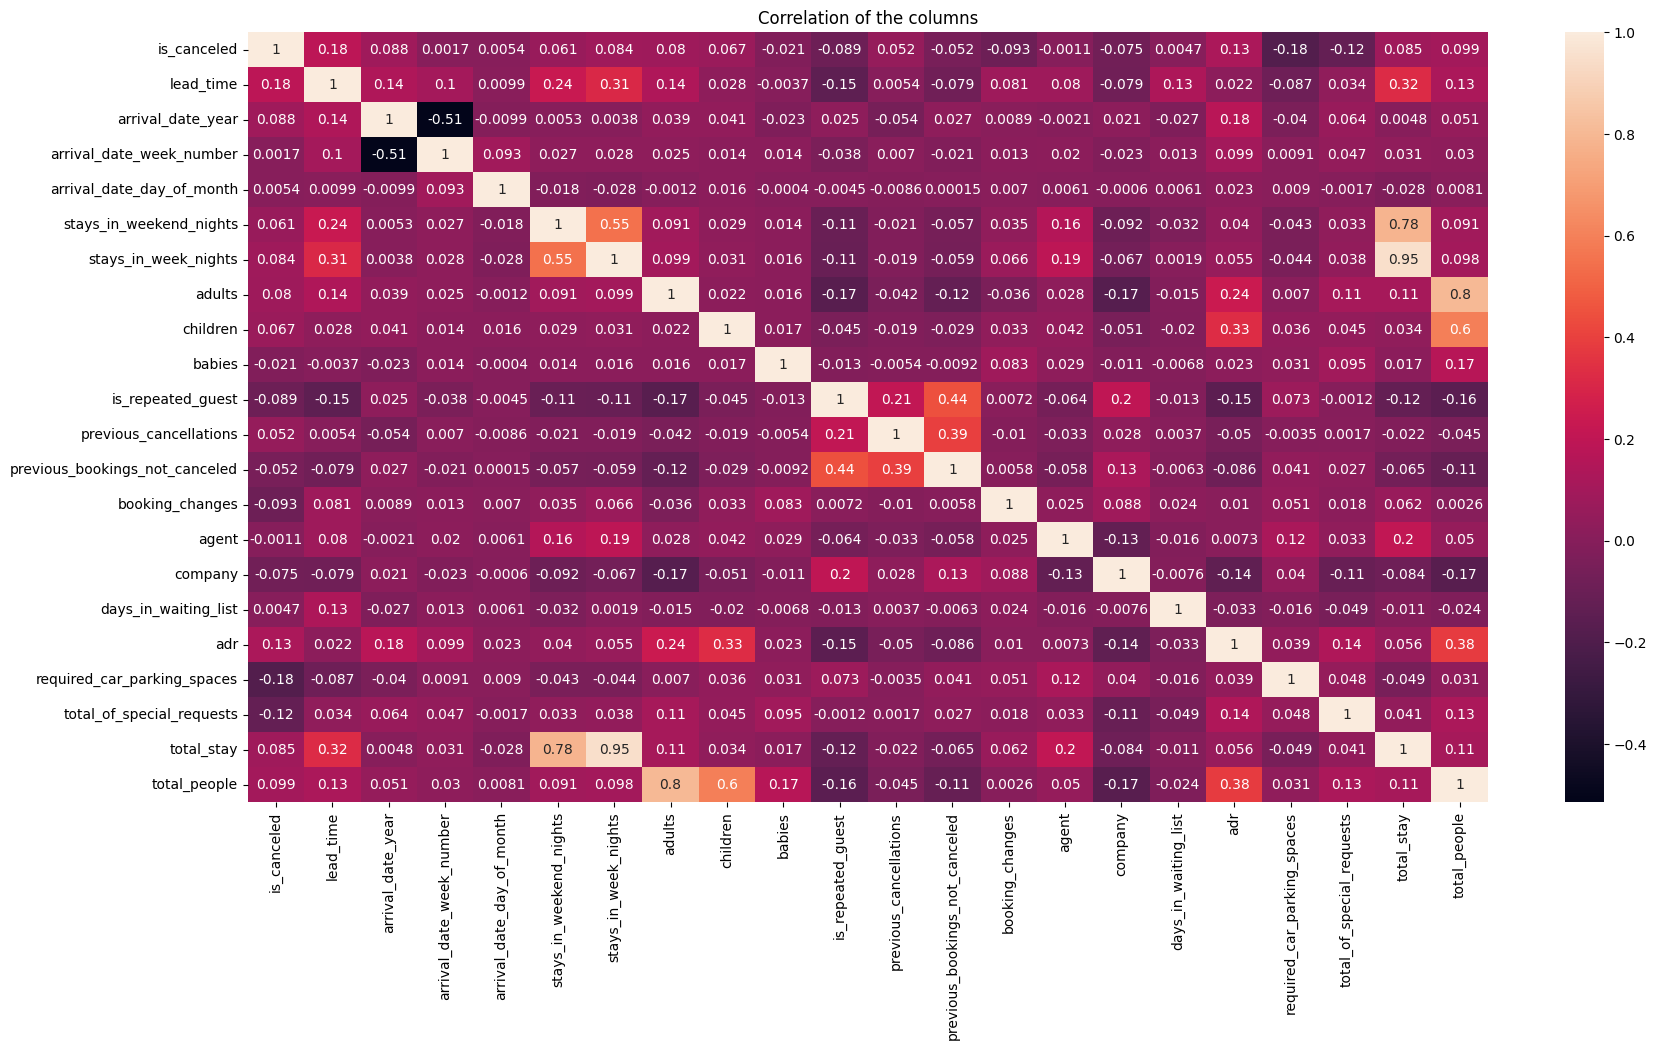

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation of the columns')
plt.show()

##### 1. Why did you pick the specific chart?

**I choose heatmap here becuase heatmap display a more eneralized view of neumeric values and also utilize color coded systems.**

##### 2. What is/are the insight(s) found from the chart?

* **arrival_date_year and arrival_date_week_number columns has negative correlation which is -0.51.**
* **stays_in_week_nights and total_stay has positive correlation which is 0.95.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

* **1) To increase hotel business some factors are important like high revenue, generation, customers satisfaction, facilities provided by hotel etc.**
* **2) I am able to achieve the same things by showing to client which hotel is most preferred , percentage of repeated guests, mostly preferred food by guests, then which hotel has highest adr etc.**
* **3) Most preferred room type is achieved by countplot so the client can be well prepare in advance and this insight help client for further enhancement of their hospatility.**
* **4) I am able to show which food type is mostly preferred so client can offer the mostly preferred food to the guests.**
* **5) Most preferred month are shown by barplot so client can be well prepared in advanced so that minimum grivances would be faced by client.**
* **6) Using barplot I am able to show which hotel type has high adr so client can analyse which hotel has high income.**
* **7) I am able to show which hotel is busiest hotel sp client can do relatable changes in facilities in less busy hotel type.**
* **8) I am able to show the relationship between repeated guests and previous bookings not cancelled so client can preferred repeated guests.**
* **9) Using barplot relationship between adr and total number of people is shown so client can preferred maximum number of people.** 

# **Conclusion**

* **1) City hotel is mostly preferred hotel by guests.**
* **2) Agent no. 9 made the most bookings.**
* **3) Percentage of repeated guest is less which is 3.86%.**
* **4) Room type A is mostly preferred room type.**
* **5) Mostly preferred food type is BBtype food.**
* **6) August month has most bookings and after august july has most bookings.**
* **7) TA/TO distribution channel is mostly used and percentage is 79.13%.**
* **8) City hotel has highest ADR. Highest ADR means more revenue.**
* **9) 2016 year had highest bookings and bookings were 42313.**
* **10) City hotel has higher waiting time means city hotel is busier hotel.**
* **11) GDS distribution channel contributed most inADR in city hotel but no contribution in resoert hotel.**
* **12) Optimal stay length in both hotel type is less than 7 days.**
* **13) Repeated guests do not cancel their bookings but not repeated guests cancel.**
* **14) If number of people is more then ADR is also increases means revenue increases.**
* **15) arrival_date_year and arrival_date_week_number columns has negative correlation which is -0.51.**
* **16) stays_in_weel_nights and total_stays has positive correlation which is 0.95.**